<a href="https://colab.research.google.com/github/salahzaame/breast_cancer_prediction/blob/main/faces_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the drive with colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing kaggle to get the dataset

In [ ]:
! pip install kaggle

### creating a directory in the collab [link text](https://)instance

In [ ]:
! mkdir ~/.kaggle

### copying the kaggle.json that containes your kaggle credentials

In [ ]:
! cp /content/drive/MyDrive/Kaggle_api_credentials/kaggle.json ~/.kaggle/

granting writing and reading only to the user

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

### dowloading the [dataset](https://www.kaggle.com/datasets/hereisburak/pins-face-recognition)

In [ ]:
! kaggle datasets download hereisburak/pins-face-recognition

 97% 362M/372M [00:07<00:00, 64.9MB/s]
100% 372M/372M [00:07<00:00, 53.5MB/s]


### unziping the zip file to get the images


In [ ]:
!unzip "/content/pins-face-recognition.zip" -d "/content/faces_classification"

Streaming output truncated to the last 5000 lines.
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner37_964.jpg  
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner38_965.jpg  
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner39_966.jpg  
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner3_956.jpg  
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner41_968.jpg  
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner42_969.jpg  
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner44_970.jpg  
  inflating: /content/faces_classification/105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner45_971.jpg  
  inflating: /content/faces_classification/105

### importing libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt

# Checking how many files and folders we have

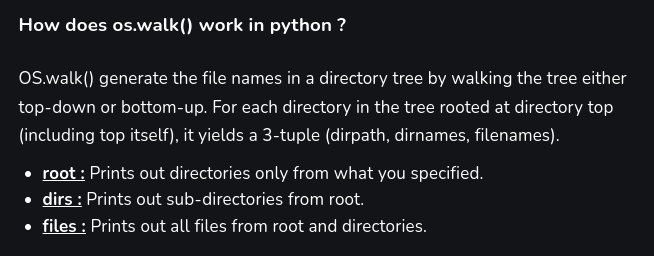

In [ ]:
main_directory = '/content/faces_classification/105_classes_pins_dataset'
folder_count = 0
total_file_count = 0

# Iterate through the main directory
for root, dirs, files in os.walk(main_directory):
    # Count folders
    folder_count += len(dirs)
    # Count files in each folder
    folder_file_count = len(files)
    total_file_count += folder_file_count

    print(f"Folder: {os.path.basename(root)}, Files: {folder_file_count}")

# Print the overall results
print(f"\nNumber of folders: {folder_count}")
print(f"Total number of files: {total_file_count}")

Folder: 105_classes_pins_dataset, Files: 0
Folder: pins_Richard Harmon, Files: 148
Folder: pins_Jessica Barden, Files: 141
Folder: pins_Zendaya, Files: 138
Folder: pins_Megan Fox, Files: 209
Folder: pins_Elizabeth Lail, Files: 158
Folder: pins_Bobby Morley, Files: 138
Folder: pins_Dominic Purcell, Files: 146
Folder: pins_Robert Downey Jr, Files: 233
Folder: pins_grant gustin, Files: 183
Folder: pins_Hugh Jackman, Files: 179
Folder: pins_Lionel Messi, Files: 86
Folder: pins_Brie Larson, Files: 169
Folder: pins_Katharine Mcphee, Files: 177
Folder: pins_Ben Affleck, Files: 126
Folder: pins_Rihanna, Files: 133
Folder: pins_Zoe Saldana, Files: 186
Folder: pins_Morgan Freeman, Files: 105
Folder: pins_Chris Pratt, Files: 176
Folder: pins_Morena Baccarin, Files: 175
Folder: pins_alycia dabnem carey, Files: 211
Folder: pins_Marie Avgeropoulos, Files: 161
Folder: pins_Leonardo DiCaprio, Files: 237
Folder: pins_Johnny Depp, Files: 182
Folder: pins_Madelaine Petsch, Files: 192
Folder: pins_Wentwor

# DISPLAYING IMAGES

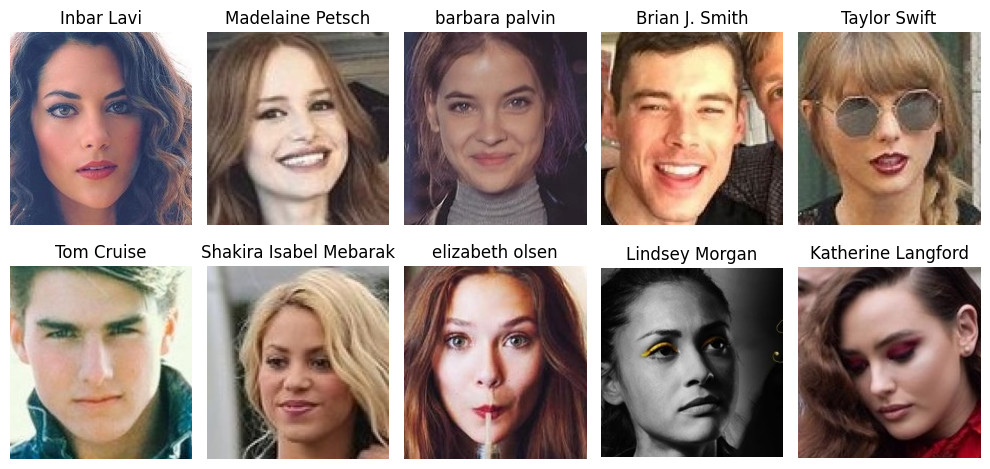

In [ ]:
# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick 10 folders
selected_folders = random.sample(all_folders, 10)

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through selected folders and display one random image from each folder
for i, folder in enumerate(selected_folders):
    folder_path = os.path.join(main_directory, folder)
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

    # Randomly pick one image
    selected_image = random.choice(all_images)

    # Get the full path to the selected image
    image_path = os.path.join(folder_path, selected_image)

    # Read and display the image
    img = mpimg.imread(image_path)
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis('off')

    # Extract label from folder name and drop the first 5 characters
    label = folder[5:]
    axes[i // 5, i % 5].set_title(label)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.2 MB/s eta 0:00:00


## Splitting data

In [ ]:
import shutil
# Copying images to train test
source_directory = '/content/faces_classification/105_classes_pins_dataset'
destination_directory = '/content/faces_classification'

# Create train and test directories if not exist
train_directory = os.path.join(destination_directory, 'train')
os.makedirs(train_directory, exist_ok=True)

# Get a list of all folders in the source directory
all_folders = [folder for folder in os.listdir(source_directory) if os.path.isdir(os.path.join(source_directory, folder))]

# Iterate through each folder
for folder in all_folders:
    folder_path = os.path.join(source_directory, folder)

    # Get a list of all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

    # Create a label for the folder (drop the first 5 characters)
    label = folder[5:]

    # Shuffle the images
    random.shuffle(all_images)

    # Move the first 85 images to the train directory
    for i in range(85):
        image_path = os.path.join(folder_path, all_images[i])
        destination_path = os.path.join(train_directory, label, all_images[i])
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(image_path, destination_path)


print("Data splitting completed.")

Data splitting completed.


detecting faces using MCTNN

1/1 [==============================] - 0s 239ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 274ms/step


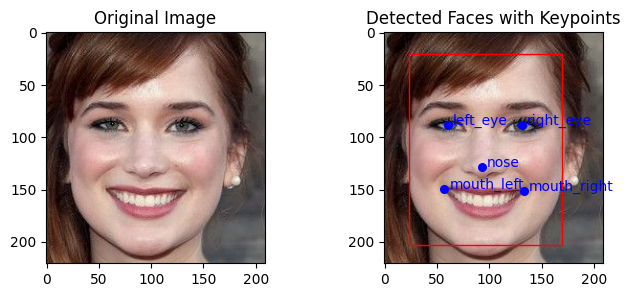

Metadata of detected faces in Elizabeth Lail/Elizabeth Lail153_1093.jpg:
Face 1:
   Confidence: 0.99
   Bounding Box: [23, 20, 147, 183]
   Keypoints: {'left_eye': (60, 88), 'right_eye': (131, 88), 'nose': (93, 128), 'mouth_left': (57, 149), 'mouth_right': (133, 151)}

1/1 [==============================] - 0s 26ms/step


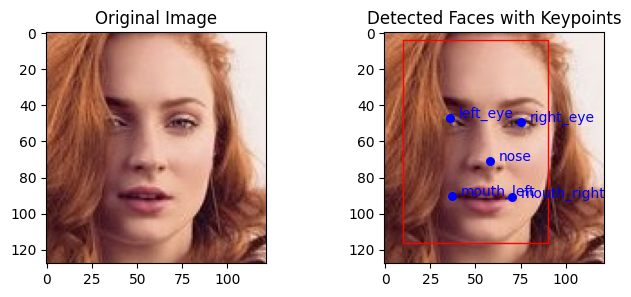

Metadata of detected faces in Sophie Turner/Sophie Turner190_900.jpg:
Face 1:
   Confidence: 0.98
   Bounding Box: [10, 4, 80, 112]
   Keypoints: {'left_eye': (36, 47), 'right_eye': (75, 49), 'nose': (58, 71), 'mouth_left': (37, 90), 'mouth_right': (70, 91)}



In [ ]:
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# Directory paths
train_directory = '/content/faces_classification/train'

# Get a list of all folders in the train directory
all_folders = [folder for folder in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, folder))]

# Randomly select two folders
selected_folders = random.sample(all_folders, 2)

# Initialize MTCNN detector
detector = MTCNN()

# Iterate through selected folders
for folder in selected_folders:
    folder_path = os.path.join(train_directory, folder)

    # Get a list of all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

    # Randomly select one image
    selected_image = random.choice(all_images)
    image_path = os.path.join(folder_path, selected_image)

    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces = detector.detect_faces(image)

    # Display image with bounding boxes around detected faces
    plt.figure(figsize=(8, 3))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    # Display image with bounding boxes
    plt.subplot(1, 2, 2)
    plt.imshow(image_rgb)

    for face in faces:
        x, y, width, height = face['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        plt.gca().add_patch(rect)

        # Display additional keypoints
        for key, value in face['keypoints'].items():
            plt.scatter(value[0], value[1], s=30, color='blue', marker='o')
            plt.text(value[0] + 5, value[1], key, color='blue')

    plt.title('Detected Faces with Keypoints')
    plt.show()

    # Display metadata of detected faces
    print(f"Metadata of detected faces in {folder}/{selected_image}:")
    for i, face in enumerate(faces):
        print(f"Face {i + 1}:")
        print(f"   Confidence: {face['confidence']:.2f}")
        print(f"   Bounding Box: {face['box']}")
        print(f"   Keypoints: {face['keypoints']}")
        print()

# PREPROCESING

checking if the train_detected_faces file exists.

In [ ]:
import os
import shutil

# Set the directory path
directory_path = '/content/faces_classification/train_detected_faces'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created.")

# Remove all files and subdirectories in the directory
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.unlink(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("Contents of train_detected_face cleared.")


Directory '/content/faces_classification/train_detected_faces' created.
Contents of train_detected_face cleared.


# FACE DETECTION Using OpenCV's deep learning-based face detector

In [ ]:
import os
import cv2
import numpy as np

data_directory = '/content/faces_classification/train'
output_directory = '/content/faces_classification/train_detected_faces'

def detect_faces_and_save(image_paths, output_directory):
    processed_images = []
    images_without_faces = 0

    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Use OpenCV's deep learning-based face detector
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        if len(faces) > 0:
            # Assuming only one face is detected
            x, y, w, h = faces[0]
            face_roi = img[y:y+h, x:x+w]
            resized_face = cv2.resize(face_roi, (224, 224))

            # Get the original folder name
            folder_name = image_path.split('/')[-2]
            # Create the output folder if it doesn't exist
            output_folder = os.path.join(output_directory, folder_name)
            os.makedirs(output_folder, exist_ok=True)

            # Save the detected face with the same folder structure
            output_path = os.path.join(output_folder, f"detected_face_{i}.jpg")
            cv2.imwrite(output_path, resized_face)

            processed_images.append(resized_face)
        else:
            images_without_faces += 1

        if i % 50 == 0:
            print(f"{i}/{len(image_paths)} images processed", end='\r', flush=True)

    print(f"\nImages without faces detected/Total images: {images_without_faces}/{len(image_paths)}")
    return np.array(processed_images)

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get list of all image paths
all_image_paths = []
for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)
    if os.path.isdir(folder_path):
        image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)]
        all_image_paths.extend(image_paths)

X_all_processed = detect_faces_and_save(all_image_paths, output_directory)

print("face detection complete")


Images without faces detected/Total images: 2145/8925
face detection complete


Displaying detected faces

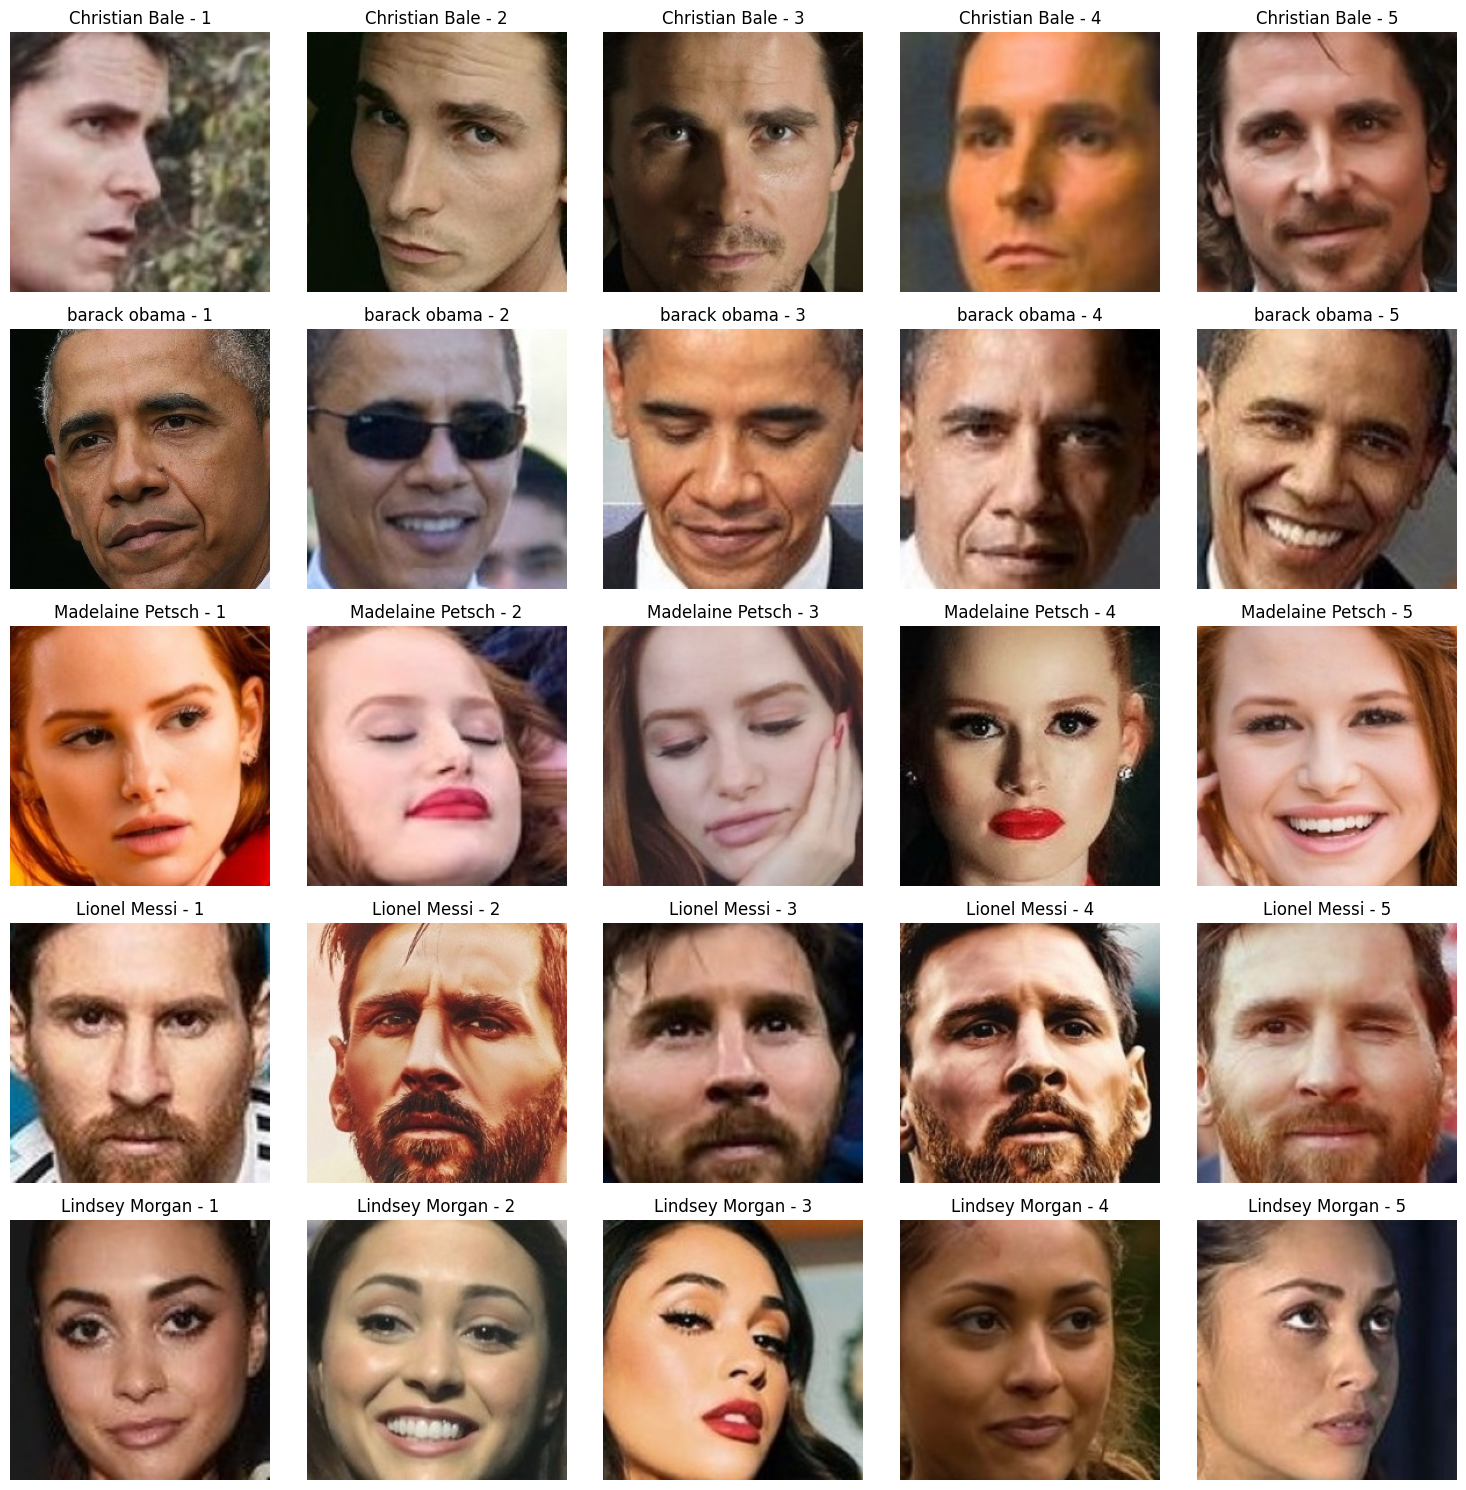

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Replace this with the path to your detected faces directory
output_directory = '/content/faces_classification/train_detected_faces'

# Get a list of subdirectories (folders) in the output directory
folders = [f for f in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, f))]

# Randomly pick five folders
selected_folders = np.random.choice(folders, size=5, replace=False)

# Set up the subplot
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i, folder_name in enumerate(selected_folders):
    folder_path = os.path.join(output_directory, folder_name)
    image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)[:5]]

    for j, image_path in enumerate(image_paths):
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        axes[i, j].imshow(img)
        axes[i, j].set_title(f'{folder_name} - {j+1}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Number of files we have under each folder

In [ ]:
import os

output_directory = '/content/faces_classification/train_detected_faces'

# Get a list of all folders under the output directory
all_folders = [folder for folder in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, folder))]

# Iterate through each folder and print the folder name and file count
for folder in all_folders:
    folder_path = os.path.join(output_directory, folder)
    file_count = len(os.listdir(folder_path))
    print(f"Folder: {folder}, File Count: {file_count}")

Folder: Lionel Messi, File Count: 65
Folder: Jeremy Renner, File Count: 62
Folder: Penn Badgley, File Count: 71
Folder: Natalie Portman, File Count: 63
Folder: elon musk, File Count: 62
Folder: Josh Radnor, File Count: 77
Folder: Nadia Hilker, File Count: 61
Folder: Avril Lavigne, File Count: 52
Folder: Pedro Alonso, File Count: 68
Folder: Emilia Clarke, File Count: 64
Folder: Henry Cavil, File Count: 64
Folder: camila mendes, File Count: 66
Folder: Tom Holland, File Count: 70
Folder: Gwyneth Paltrow, File Count: 77
Folder: Alvaro Morte, File Count: 52
Folder: alycia dabnem carey, File Count: 63
Folder: Maria Pedraza, File Count: 54
Folder: Cristiano Ronaldo, File Count: 65
Folder: Selena Gomez, File Count: 53
Folder: Stephen Amell, File Count: 69
Folder: Tom Cruise, File Count: 63
Folder: Rebecca Ferguson, File Count: 77
Folder: Leonardo DiCaprio, File Count: 63
Folder: Tom Hiddleston, File Count: 66
Folder: gal gadot, File Count: 53
Folder: Zoe Saldana, File Count: 75
Folder: Mark Ru

In [ ]:
!pip install keras opencv-python-headless matplotlib

### Demonstration how can we calculate the distance between two embeddings extracted using AlexNet

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

# Define AlexNet-like architecture
def create_alexnet(input_shape=(224, 224, 3), num_classes=1000):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the AlexNet model
alexnet_model = create_alexnet()

# Load and preprocess images
face1_img = load_img('/content/faces_classification/train_detected_faces/Adriana Lima/detected_face_2380.jpg', target_size=(224, 224))
face2_img = load_img('/content/faces_classification/train_detected_faces/Adriana Lima/detected_face_2386.jpg', target_size=(224, 224))

face1_array = img_to_array(face1_img)
face2_array = img_to_array(face2_img)

face1_array = preprocess_input(face1_array)
face2_array = preprocess_input(face2_array)

# Expand dimensions to match model input shape
face1_tensor = np.expand_dims(face1_array, axis=0)
face2_tensor = np.expand_dims(face2_array, axis=0)

# Get embeddings for the first face
embeddings1 = alexnet_model.predict(face1_tensor)

# Get embeddings for the second face
embeddings2 = alexnet_model.predict(face2_tensor)

# Calculate distance between the two embeddings
distance = np.linalg.norm(embeddings1 - embeddings2)

# Display the distance between the two embeddings
print(f"Distance between embeddings: {distance:.4f}")


1/1 [==============================] - 0s 112ms/step
Distance between embeddings: 0.1363


## Exctracting embeddings

In [ ]:
import shutil
import os

folder_path = '/content/faces_classification/extracted_embeddings2'

# Check if the folder exists before deleting
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder {folder_path} has been deleted.")
else:
    print(f"The folder {folder_path} does not exist.")

The folder /content/faces_classification/extracted_embeddings2 does not exist.


In [ ]:
!pip install facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00


In [ ]:
import torch
from facenet_pytorch import InceptionResnetV1
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# Function to extract embeddings from a single folder with data augmentation
def extract_embeddings_from_folder(folder_path, face_embedder, device, output_directory):
    embeddings = {}
    data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(10),
        transforms.ToTensor()
    ])

    label = os.path.basename(folder_path)  # Get the label from the folder name

    for image_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"):
        image_path = os.path.join(folder_path, image_name)
        try:
            img = Image.open(image_path)

            # Convert image to tensor
            img_tensor = transforms.ToTensor()(img).unsqueeze(0).float().to(device)

            # Calculate embedding
            embedding = face_embedder(img_tensor).squeeze().detach().cpu().numpy()
            embeddings[image_name] = embedding

            # Save the embedding for the original image
            output_emb_path = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_embedding.npy")
            np.save(output_emb_path, embedding)

            # Apply data augmentation
            augmented_img = data_transform(img)

            # Convert augmented image to tensor
            img_tensor_augmented = augmented_img.unsqueeze(0).float().to(device)

            # Calculate embedding for the augmented image
            embedding_augmented = face_embedder(img_tensor_augmented).squeeze().detach().cpu().numpy()
            embeddings[f"{os.path.splitext(image_name)[0]}_augmented_embedding.npy"] = embedding_augmented

            # Save the embedding for the augmented image
            output_emb_path_augmented = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_augmented_embedding.npy")
            np.save(output_emb_path_augmented, embedding_augmented)

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

    return label, embeddings

# Directory paths
input_directory = '/content/faces_classification/train_detected_faces'
output_directory = '/content/faces_classification/extracted_embeddings2'

# Initialize InceptionResnetV1 for face embedding
#device = 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
face_embedder = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Loop through each folder in the input directory
for folder_name in os.listdir(input_directory):
    folder_path = os.path.join(input_directory, folder_name)

    # Create subfolder in output_directory for the current label
    label_output_directory = os.path.join(output_directory, folder_name)
    os.makedirs(label_output_directory, exist_ok=True)

    # Extract embeddings from the current folder with data augmentation
    label, embeddings = extract_embeddings_from_folder(folder_path, face_embedder, device, label_output_directory)

print("Embeddings extraction complete.")

  0%|          | 0.00/107M [00:00<?, ?B/s]

Processing /content/faces_classification/train_detected_faces/Lionel Messi: 100%|██████████| 65/65 [00:28<00:00,  2.30it/s]
Processing /content/faces_classification/train_detected_faces/Jeremy Renner: 100%|██████████| 62/62 [00:26<00:00,  2.34it/s]
Processing /content/faces_classification/train_detected_faces/Penn Badgley: 100%|██████████| 71/71 [00:28<00:00,  2.51it/s]
Processing /content/faces_classification/train_detected_faces/Natalie Portman: 100%|██████████| 63/63 [00:29<00:00,  2.16it/s]
Processing /content/faces_classification/train_detected_faces/elon musk: 100%|██████████| 62/62 [00:24<00:00,  2.58it/s]
Processing /content/faces_classification/train_detected_faces/Josh Radnor: 100%|██████████| 77/77 [00:29<00:00,  2.58it/s]
Processing /content/faces_classification/train_detected_faces/Nadia Hilker: 100%|██████████| 61/61 [00:22<00:00,  2.77it/s]
Processing /content/faces_classification/train_detected_faces/Avril Lavigne: 100%|██████████| 52/52 [00:21<00:00,  2.38it/s]
Process

Embeddings extraction complete.


In [ ]:
import os

# Directory path
output_directory = '/content/faces_classification/extracted_embeddings2'

# Get folder names and file counts
folders_and_counts = [(folder, len(os.listdir(os.path.join(output_directory, folder)))) for folder in os.listdir(output_directory)]

# Print results
for folder, count in folders_and_counts:
    print(f"Folder: {folder}, Number of Files: {count}")

Folder: Lionel Messi, Number of Files: 130
Folder: Jeremy Renner, Number of Files: 124
Folder: Penn Badgley, Number of Files: 142
Folder: Natalie Portman, Number of Files: 126
Folder: elon musk, Number of Files: 124
Folder: Josh Radnor, Number of Files: 154
Folder: Nadia Hilker, Number of Files: 122
Folder: Avril Lavigne, Number of Files: 104
Folder: Pedro Alonso, Number of Files: 136
Folder: Emilia Clarke, Number of Files: 128
Folder: Henry Cavil, Number of Files: 128
Folder: camila mendes, Number of Files: 132
Folder: Tom Holland, Number of Files: 140
Folder: Gwyneth Paltrow, Number of Files: 154
Folder: Alvaro Morte, Number of Files: 104
Folder: alycia dabnem carey, Number of Files: 126
Folder: Maria Pedraza, Number of Files: 108
Folder: Cristiano Ronaldo, Number of Files: 130
Folder: Selena Gomez, Number of Files: 106
Folder: Stephen Amell, Number of Files: 138
Folder: Tom Cruise, Number of Files: 126
Folder: Rebecca Ferguson, Number of Files: 154
Folder: Leonardo DiCaprio, Number 

In [ ]:
import shutil

folder_path = '/content/faces_classification/extracted_embeddingstest'

# Check if the folder exists before deleting
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder {folder_path} has been deleted.")
else:
    print(f"The folder {folder_path} does not exist.")

The folder /content/faces_classification/extracted_embeddingstest does not exist.


In [ ]:
import shutil

source_folder = "/content/faces_classification/extracted_embeddings2"
destination_folder = "/content/faces_classification/extracted_embeddingstest"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through each folder in the source directory
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Create the corresponding folder in the destination directory
        destination_folder_path = os.path.join(destination_folder, folder_name)
        os.makedirs(destination_folder_path, exist_ok=True)

        # Get the list of files in the current folder
        files = os.listdir(folder_path)

        # Move the first two files that do not contain "augmented" in their names
        moved_files = 0
        for file_name in files:
            if "augmented" not in file_name:
                source_file_path = os.path.join(folder_path, file_name)
                destination_file_path = os.path.join(destination_folder_path, file_name)

                # Move the file (not copy)
                shutil.move(source_file_path, destination_file_path)
                moved_files += 1

                if moved_files == 2:
                    break  # Break after moving two suitable files

print("Files moved successfully.")

Files moved successfully.


finding similarities using distance between embeddings

In [ ]:
import os
import numpy as np
from sklearn.metrics import pairwise_distances

# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)

                # Compare test embedding with averaged embeddings
                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                # Predict the label with the minimum distance
                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions


# folder paths
base_folder = '/content/faces_classification/extracted_embeddings2'
test_folder = '/content/faces_classification/extracted_embeddingstest'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Recognize faces in the test folder
predictions = recognize_faces(test_folder, average_embeddings)

# Print the predictions
for file_name, actual_label, predicted_label in predictions:
    print(f"{file_name}: Actual Label - {actual_label}, Predicted Label - {predicted_label}")

Lionel Messi_detected_face_42_embedding.npy: Actual Label - Lionel Messi, Predicted Label - Lionel Messi
Lionel Messi_detected_face_40_embedding.npy: Actual Label - Lionel Messi, Predicted Label - Lionel Messi
Jeremy Renner_detected_face_155_embedding.npy: Actual Label - Jeremy Renner, Predicted Label - Jeremy Renner
Jeremy Renner_detected_face_125_embedding.npy: Actual Label - Jeremy Renner, Predicted Label - Jeremy Renner
Penn Badgley_detected_face_234_embedding.npy: Actual Label - Penn Badgley, Predicted Label - Penn Badgley
Penn Badgley_detected_face_252_embedding.npy: Actual Label - Penn Badgley, Predicted Label - Penn Badgley
Natalie Portman_detected_face_257_embedding.npy: Actual Label - Natalie Portman, Predicted Label - Millie Bobby Brown
Natalie Portman_detected_face_310_embedding.npy: Actual Label - Natalie Portman, Predicted Label - Natalie Portman
elon musk_detected_face_344_embedding.npy: Actual Label - elon musk, Predicted Label - elon musk
elon musk_detected_face_416_em

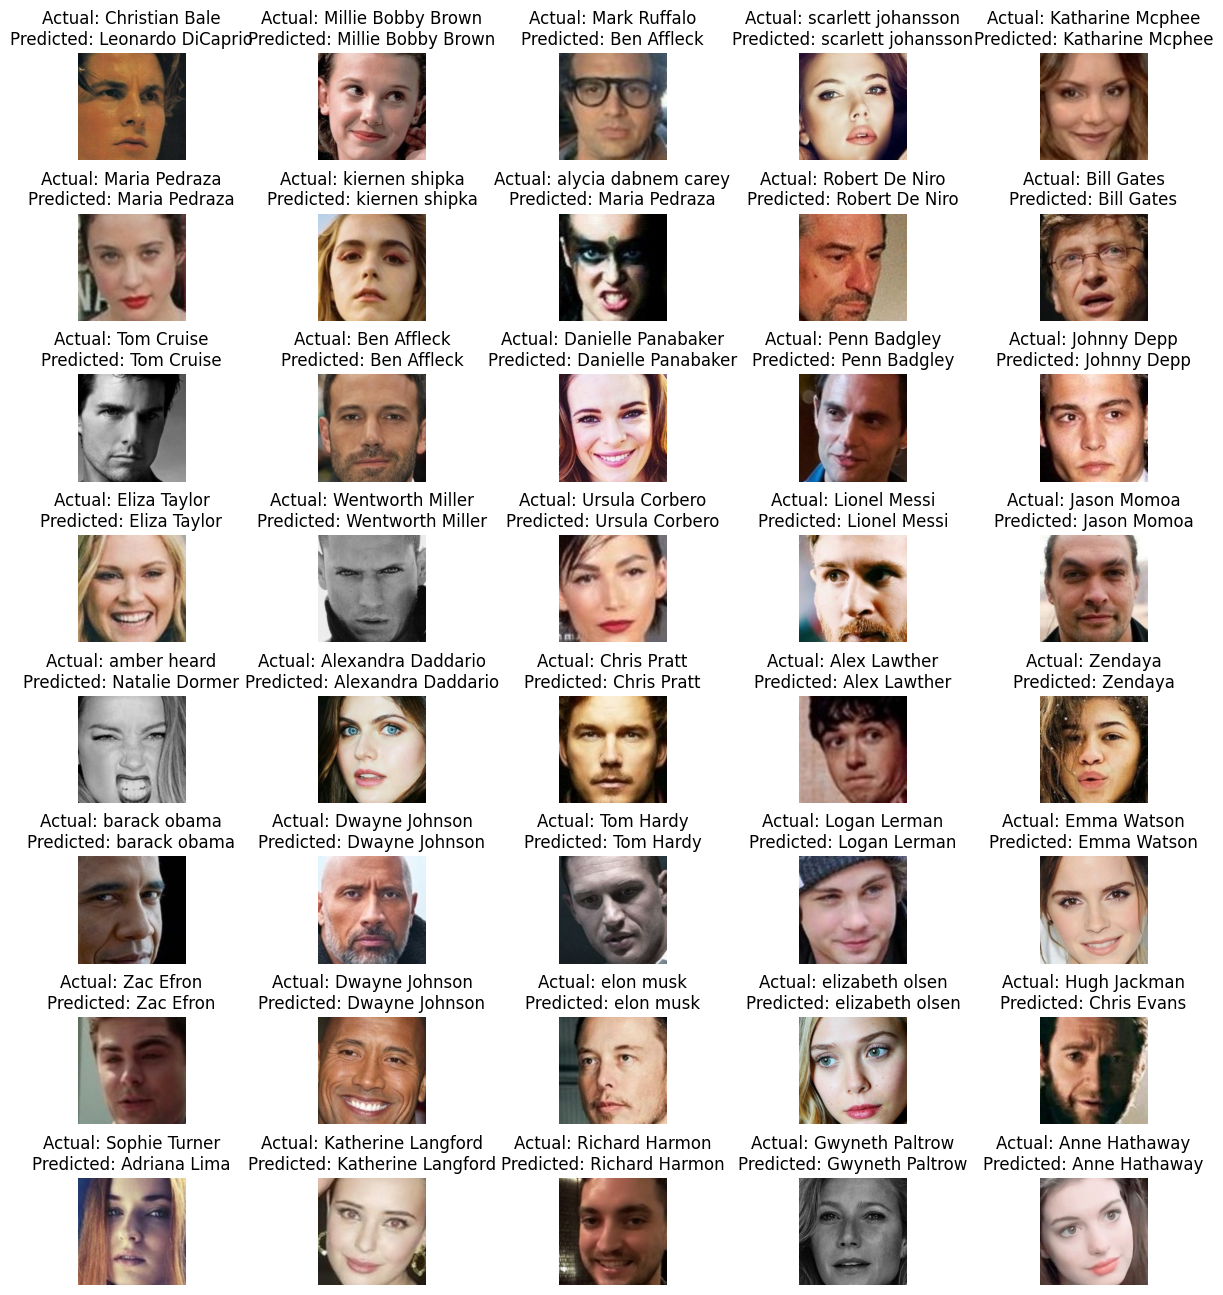

In [ ]:
from sklearn.metrics import pairwise_distances
from PIL import Image
import matplotlib.pyplot as plt


# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Load embeddings using your preferred method (e.g., np.load())
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)

                # Compare test embedding with averaged embeddings
                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                # Predict the label with the minimum distance
                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions

import random

# Function to display images with actual and predicted labels
def display_random_images(predictions, image_folder, num_images=40):
    selected_predictions = random.sample(predictions, min(num_images, len(predictions)))

    # Calculate the number of rows and columns based on the desired number of images
    num_rows = (num_images + 4) // 5  # Ensure at least 1 row
    num_cols = min(5, num_images)  # Maximum of 5 columns

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing

    for i, (file_name, actual_label, predicted_label) in enumerate(selected_predictions):
        # Extract identifier from the file name
        identifier_start = file_name.find("_detected_face_") + len("_detected_face_")
        identifier_end = file_name.find("_", identifier_start)
        if identifier_end == -1:
            identifier = file_name[identifier_start:]
        else:
            identifier = file_name[identifier_start:identifier_end]

        # Construct the file path for the corresponding image
        image_name = f"detected_face_{identifier}.jpg"
        image_path = os.path.join(image_folder, actual_label, image_name)

        # Display the actual image along with labels
        try:
            image = Image.open(image_path)
            axes[i // 5, i % 5].imshow(image)
            axes[i // 5, i % 5].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
            axes[i // 5, i % 5].axis('off')

        except FileNotFoundError:
            print(f"Image not found for {identifier}. Skipping to the next one.")

    plt.show()

display_random_images(predictions, '/content/faces_classification/train_detected_faces', num_images=40)

# folder paths
base_folder = '/content/faces_classification/extracted_embeddings2'
test_folder = '/content/faces_classification/extracted_embeddingstest'
image_folder = '/content/faces_classification/train_detected_faces'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Recognize faces in the test folder
predictions = recognize_faces(test_folder, average_embeddings)

# Display 10 images with actual and predicted labels
#display_images(predictions, image_folder, num_images=10)

In [ ]:
def load_test_embeddings(test_folder):
    test_embeddings = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)
                test_embeddings.append((file_name, label_folder, test_embedding))

    return test_embeddings


# folder paths
base_folder = '/content/faces_classification/extracted_embeddings2'
test_folder = '/content/faces_classification/extracted_embeddingstest'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Load test embeddings
test_embeddings = load_test_embeddings(test_folder)

# Randomly pick two test embeddings
random_test_embeddings = random.sample(test_embeddings, 2)

# Print the randomly picked test embeddings
for file_name, label, test_embedding in random_test_embeddings:
      print(f"Randomly Picked Test Embedding ({label}): {test_embedding}")

# Calculate and print distances between the random test embeddings and all average embeddings
for file_name, label, test_embedding in random_test_embeddings:
    print(f"\nDistances for {file_name} ({label}) against Average Embeddings:")
    for avg_label, avg_embedding in average_embeddings.items():
        distance = np.linalg.norm(test_embedding - avg_embedding)
        print(f"  Distance to {avg_label}: {distance}")

Randomly Picked Test Embedding (camila mendes): [ 6.38674349e-02  1.60323048e-03 -7.59354159e-02 -2.59354291e-03
 -7.25428164e-02 -6.16719620e-03  2.79885940e-02  2.47618612e-02
  1.76070128e-02  6.77383097e-04 -8.80092630e-05  2.93338485e-02
  8.14687833e-03 -2.97928732e-02  3.56707373e-03 -3.48194055e-02
  1.16539687e-01  1.54197598e-02  5.51391467e-02 -4.84258793e-02
 -3.69624910e-03 -8.53785276e-02  5.04575558e-02  1.07678808e-02
  4.36366834e-02 -8.62106383e-02  1.26113975e-02 -3.97112891e-02
 -4.97376546e-02 -1.50565756e-02 -1.85085442e-02 -1.23602180e-02
 -4.00700644e-02  3.31128128e-02 -6.39414936e-02  3.06324922e-02
 -2.38605607e-02  3.31831500e-02 -3.64389457e-02  3.47492769e-02
  6.74922997e-03 -4.70638312e-02 -5.48821278e-02  3.19142677e-02
 -3.95651422e-02  4.53073010e-02  3.47832143e-02  4.28719968e-02
 -6.31086295e-03 -3.81206796e-02  4.95323353e-02  4.56629023e-02
  1.03040999e-02  6.39847815e-02 -1.98122617e-02 -8.71028472e-03
  3.48235853e-02  4.33132946e-02  7.932709

# find similar pictures to an external picture



In [ ]:
!pip install facenet_pytorch

Distances:
Lionel Messi: 1.0805878639221191
Jeremy Renner: 1.2296555042266846
Penn Badgley: 1.1086935997009277
Natalie Portman: 1.1263495683670044
elon musk: 1.2111833095550537
Josh Radnor: 1.185910701751709
Nadia Hilker: 0.9078410267829895
Avril Lavigne: 1.0361251831054688
Pedro Alonso: 1.035997986793518
Emilia Clarke: 1.0721092224121094
Henry Cavil: 1.1594334840774536
camila mendes: 1.103051781654358
Tom Holland: 1.0435633659362793
Gwyneth Paltrow: 1.170170783996582
Alvaro Morte: 1.1646692752838135
alycia dabnem carey: 1.0110574960708618
Maria Pedraza: 1.0679759979248047
Cristiano Ronaldo: 1.2359410524368286
Selena Gomez: 1.0211482048034668
Stephen Amell: 1.1346352100372314
Tom Cruise: 1.1774297952651978
Rebecca Ferguson: 1.043244481086731
Leonardo DiCaprio: 1.0557219982147217
Tom Hiddleston: 1.1551872491836548
gal gadot: 1.1138763427734375
Zoe Saldana: 1.0366877317428589
Mark Ruffalo: 1.1282185316085815
Ben Affleck: 1.19594144821167
Adriana Lima: 1.1256909370422363
melissa fumero: 1

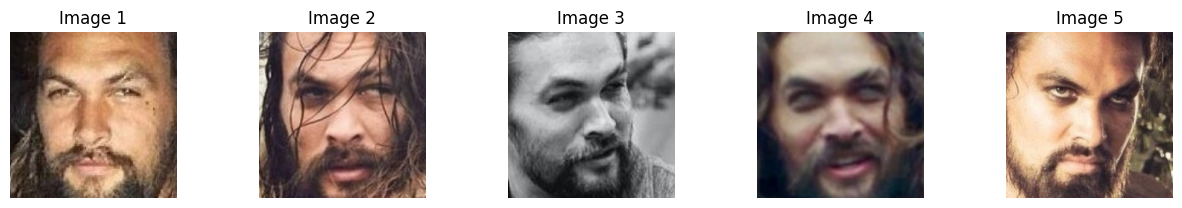

In [ ]:
import numpy as np
from PIL import Image
import torch
import os
import random
from facenet_pytorch import InceptionResnetV1
from torchvision import transforms
import matplotlib.pyplot as plt

# Directory paths
base_folder = '/content/faces_classification/extracted_embeddings2'
test_folder = '/content/faces_classification/extracted_embeddingstest'
image_folder = '/content/faces_classification/train_detected_faces'


# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Load embeddings using your preferred method (e.g., np.load())
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Initialize InceptionResnetV1 for face embedding
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
face_embedder = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to extract embeddings from a single image
def extract_embedding_from_image(image_path, face_embedder, device):
    try:
        img = Image.open(image_path)
        img_tensor = transforms.ToTensor()(img).unsqueeze(0).float().to(device)
        embedding = face_embedder(img_tensor).squeeze().detach().cpu().numpy()
        return embedding
    except Exception as e:
        print(f"Error extracting embedding from {image_path}: {str(e)}")
        return None

# Function to find similar images for the input embedding
def find_similar_images(input_embedding, average_embeddings):
    distances = {}
    for label, avg_embedding in average_embeddings.items():
        distance = np.linalg.norm(input_embedding - avg_embedding)
        distances[label] = distance

    # Print distances for each label
    print("Distances:")
    for label, distance in distances.items():
        print(f"{label}: {distance}")

    # Predict the label with the minimum distance
    predicted_label = min(distances, key=distances.get)
    return predicted_label, distances


# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Example usage
input_image_path = '/content/drive/MyDrive/faces_classification/220px-Jason_Momoa_by_Gage_Skidmore.jpg'
input_embedding = extract_embedding_from_image(input_image_path, face_embedder, device)

if input_embedding is not None:
    predicted_label, distances = find_similar_images(input_embedding, average_embeddings)
    print(f"This image is similar to : {predicted_label}")
    print("Similare pictures")
    #for label, distance in distances.items():
        #print(f"{label}: {distance}")




# Optionally, display similar images
similar_images_folder = os.path.join('/content/faces_classification/train_detected_faces/', predicted_label)

# Get a list of image files in the folder
image_files = [f for f in os.listdir(similar_images_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display 5 random images from the folder
num_images_to_display = min(5, len(image_files))
selected_images = random.sample(image_files, num_images_to_display)

# Set up the plot
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))
fig.subplots_adjust(wspace=0.5)

# Display the images
for i, image_file in enumerate(selected_images):
    image_path = os.path.join(similar_images_folder, image_file)
    try:
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image {i + 1}")
        axes[i].axis('off')

    except FileNotFoundError:
        print(f"Image not found for {image_file}. Skipping to the next one.")

plt.show()